In [10]:
#imports necessary libraries to do basic things on the dataset
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


print('Successfully imported')

Successfully imported


In [11]:
data = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014.csv')
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [12]:
#Check the dataset for missing data
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))

There is 2907 missing data in our dataset 


In [13]:
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)
frame

,0,1,2
Stn Code,0,30,int64
Sampling Date,0,302,object
State,0,1,object
City/Town/Village/Area,0,8,object
Location of Monitoring Station,0,30,object
Agency,0,2,object
Type of Location,0,2,object
SO2,11,33,float64
NO2,13,53,float64
RSPM/PM10,4,169,float64


In [14]:
data['City/Town/Village/Area'].unique()

array(['Chennai', 'Coimbatore', 'Cuddalore', 'Madurai', 'Mettur', 'Salem',
       'Thoothukudi', 'Trichy'], dtype=object)

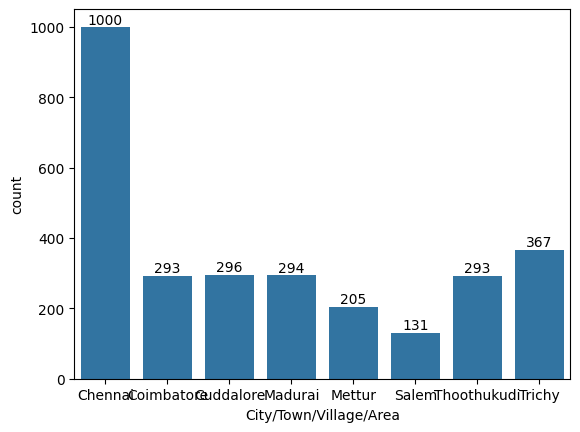

In [15]:
ax = sns.countplot(data = data , x = 'City/Town/Village/Area');
#Add the value of each parametr on the Plot
ax.bar_label(ax.containers[0]);

In [25]:
from sklearn.impute import SimpleImputer
import numpy as np
columns_to_drop = ['Stn Code', 'Sampling Date', 'State']
for column in columns_to_drop:
    if column in data.columns:
        data = data.drop(columns=[column])


# Fill in missing values in work_interfere column
data['City/Town/Village/Area'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['City/Town/Village/Area'].values.reshape(-1,1)))
data['Location of Monitoring Station'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['Location of Monitoring Station'].values.reshape(-1,1)))

data.head()

,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


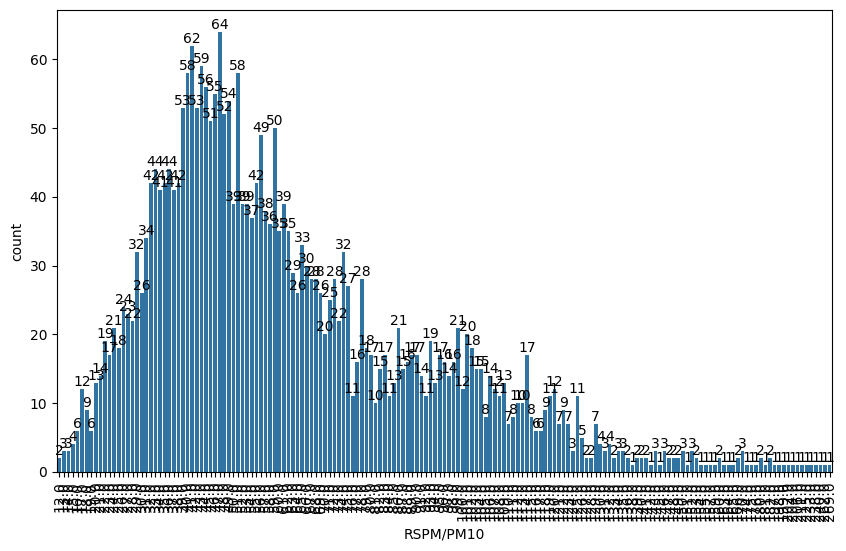

In [28]:
plt.figure(figsize = (10,6))
RSPMPM10_range_plot = sns.countplot(data = data, x = 'RSPM/PM10');
RSPMPM10_range_plot.bar_label(RSPMPM10_range_plot.containers[0]);
plt.xticks(rotation=90);

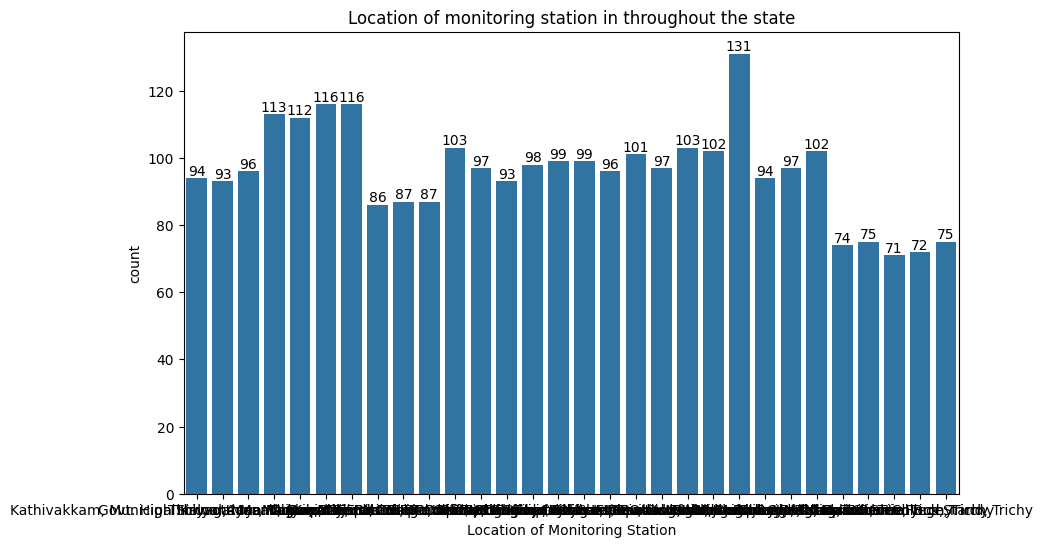

In [31]:
plt.figure(figsize = (10,6));
treat = sns.countplot(data = data,  x = 'Location of Monitoring Station');
treat.bar_label(treat.containers[0]);
plt.title('Location of monitoring station in throughout the state');


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City/Town/Village/Area          2879 non-null   object 
 1   Location of Monitoring Station  2879 non-null   object 
 2   Agency                          2879 non-null   object 
 3   Type of Location                2879 non-null   object 
 4   SO2                             2868 non-null   float64
 5   NO2                             2866 non-null   float64
 6   RSPM/PM10                       2875 non-null   float64
 7   PM 2.5                          0 non-null      float64
dtypes: float64(4), object(4)
memory usage: 180.1+ KB


In [33]:
data.describe()

,SO2,NO2,RSPM/PM10,PM 2.5
count,2868.000000,2866.000000,2875.000000,0.0
mean,11.503138,22.136776,62.494261,NaN
std,5.051702,7.128694,31.368745,NaN
min,2.000000,5.000000,12.000000,NaN
25%,8.000000,17.000000,41.000000,NaN
50%,12.000000,22.000000,55.000000,NaN
75%,15.000000,25.000000,78.000000,NaN
max,49.000000,71.000000,269.000000,NaN


In [41]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

data['RSPM/PM10'] = MaxAbsScaler().fit_transform(data[['RSPM/PM10']])
data['NO2'] = StandardScaler().fit_transform(data[['NO2']])
data['PM 2.5'] = StandardScaler().fit_transform(data[['PM 2.5']])
data['SO2'] = StandardScaler().fit_transform(data[['SO2']])

data.describe()

c:\Users\19164\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\19164\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\19164\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,SO2,NO2,RSPM/PM10,PM 2.5
count,2.868000e+03,2866.000000,2875.000000,0.0
mean,-1.585590e-16,0.000000,0.232321,NaN
std,1.000174e+00,1.000175,0.116612,NaN
min,-1.881503e+00,-2.404335,0.044610,NaN
25%,-6.935779e-01,-0.720703,0.152416,NaN
50%,9.837249e-02,-0.019190,0.204461,NaN
75%,6.923353e-01,0.401718,0.289963,NaN
max,7.423913e+00,6.855638,1.000000,NaN
